<a href="https://colab.research.google.com/github/sriloksagar/NLP/blob/master/OCR_NER_scispaCy_(main_code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pre-processing the pdf files before feeding it to the NLP program**

**Importing and Installing Libraries**

In [ ]:
!pip install tesseract
!pip install pytesseract
!sudo apt install tesseract-ocr

     |████████████████████████████████| 45.6MB 67kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562571 sha256=4913dafab772e6532d186e24a3bd39de1fbd6abb98708da4477cbe471aa2d6d3
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
  Created wheel for pytesseract: filename=pytesseract-0.3.2-py2.py3-none-any.whl size=13373 sha256=375f5a4acc34ec8ee95e3b9c9412af1f1cde2a02a7d1aa7cce82d7cb0d16be6a
  Stored in directory: /root/.cache/pip/wheels/c2/60/55/ec507bce8e8ccb516954accf661ee60c8b34198fafdfb81872
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW pa

In [ ]:
!pip install -U spacy
#uninstalling the previous models of spacy

!pip install scispacy
#installing the latest spacy models 

     |████████████████████████████████| 10.4MB 8.3MB/s 
     |████████████████████████████████| 3.7MB 63.7MB/s 
     |████████████████████████████████| 122kB 75.7MB/s 
     |████████████████████████████████| 2.2MB 61.8MB/s 
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstalling spacy-2.1.9:
      Successfully uninstalled spacy-2.1.9
     |████████████████████████████████| 2.9MB 11.0MB/s 
     |████████████████████████████████| 13.0MB 58.7MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 5.9MB 45.8MB/s 
     |████████████████████████████████| 153kB 55.3MB/s 
  Created wheel for scispacy: 

In [ ]:
!pip install PyPDF2
#library for pdf related tasks like pagecount etc

!pip install pdf2image
#library for converting pdf to image

     |████████████████████████████████| 81kB 6.2MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=14e06390ff82997e72c76071afa1616df50d76ac9dd4f87418a3269cc9481712
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
  Created wheel for pdf2image: filename=pdf2image-1.12.1-cp36-none-any.whl size=9027 sha256=ea3d55a3f8c53cf4769d465cb3c4bd4583216a49c2b2421fc4f607e1545fd7bb
  Stored in directory: /root/.cache/pip/wheels/0f/80/3a/fac1dc0f7dbe12c805b9dc6497f325f0e9f9cedbec3ab0185b
Successfully built pdf2image


In [ ]:
import cv2
#importing opencv2

import numpy as np
#Numpy library

import matplotlib.pyplot as plt
#plotting library
%matplotlib inline

from PIL import Image
#PIL refers to Pillow, related to Poppler. Poppler comes into play while converting pdf to image.

from skimage.io import imread
#module from skimage library to display the images

import PyPDF2
from PyPDF2 import PdfFileReader
import pdf2image
from pdf2image import convert_from_path, convert_from_bytes

import pytesseract
#library for OCR

**Mounting Google Drive for importing files**

In [ ]:
"""This is exclusively for importing files in Google colab. Ignore the below two lines while using a local environment like jupyter notebooks or spyder"""
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Reading the files**

In [ ]:
# installing poppler that converts the pdf to a image
""" While using a local environment, there might be a change in the way the package is installed. Please google 'How to install poppler' """
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 0s (2,199 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 145160 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.10) ...
Setting up poppler-utils (0.62.0-2ubuntu2.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
#opening the file and storing it as a f
f = open(r'/content/drive/My Drive/Colab Notebooks/Intern_ND/p21-33.pdf','rb')

#reading the file and converting the pdf pages into keys that refer to images. pages here is neither a list of images nor pdfs. It is a list of keys
pages = convert_from_path(r'/content/drive/My Drive/Colab Notebooks/Intern_ND/p21-33.pdf',500,)

In [ ]:
#using PyPDF2 to get the page numbers
reader = PyPDF2.PdfFileReader(f)
page_nos = reader.getNumPages()
print(page_nos)

13


In [ ]:
#using regular expressions to find out the title of the file from the given filepath
filename = r'/content/drive/My Drive/Colab Notebooks/Intern_ND/p21-33.pdf'
import re
pattern = re.compile('[A-Za-z0-9-]+(?=(.pdf))')
mo = pattern.search(filename)
print(mo.group())

p21-33


In [ ]:
#saving the list of keys called pages as images. At this point we have all the pages stored as images which are named with an extension to the existing pdf filename
i=0
for page in pages:
    page.save(str(mo.group())+str(-i)+'.jpg','JPEG')
    i+=1

Please input a page number less than  13
8


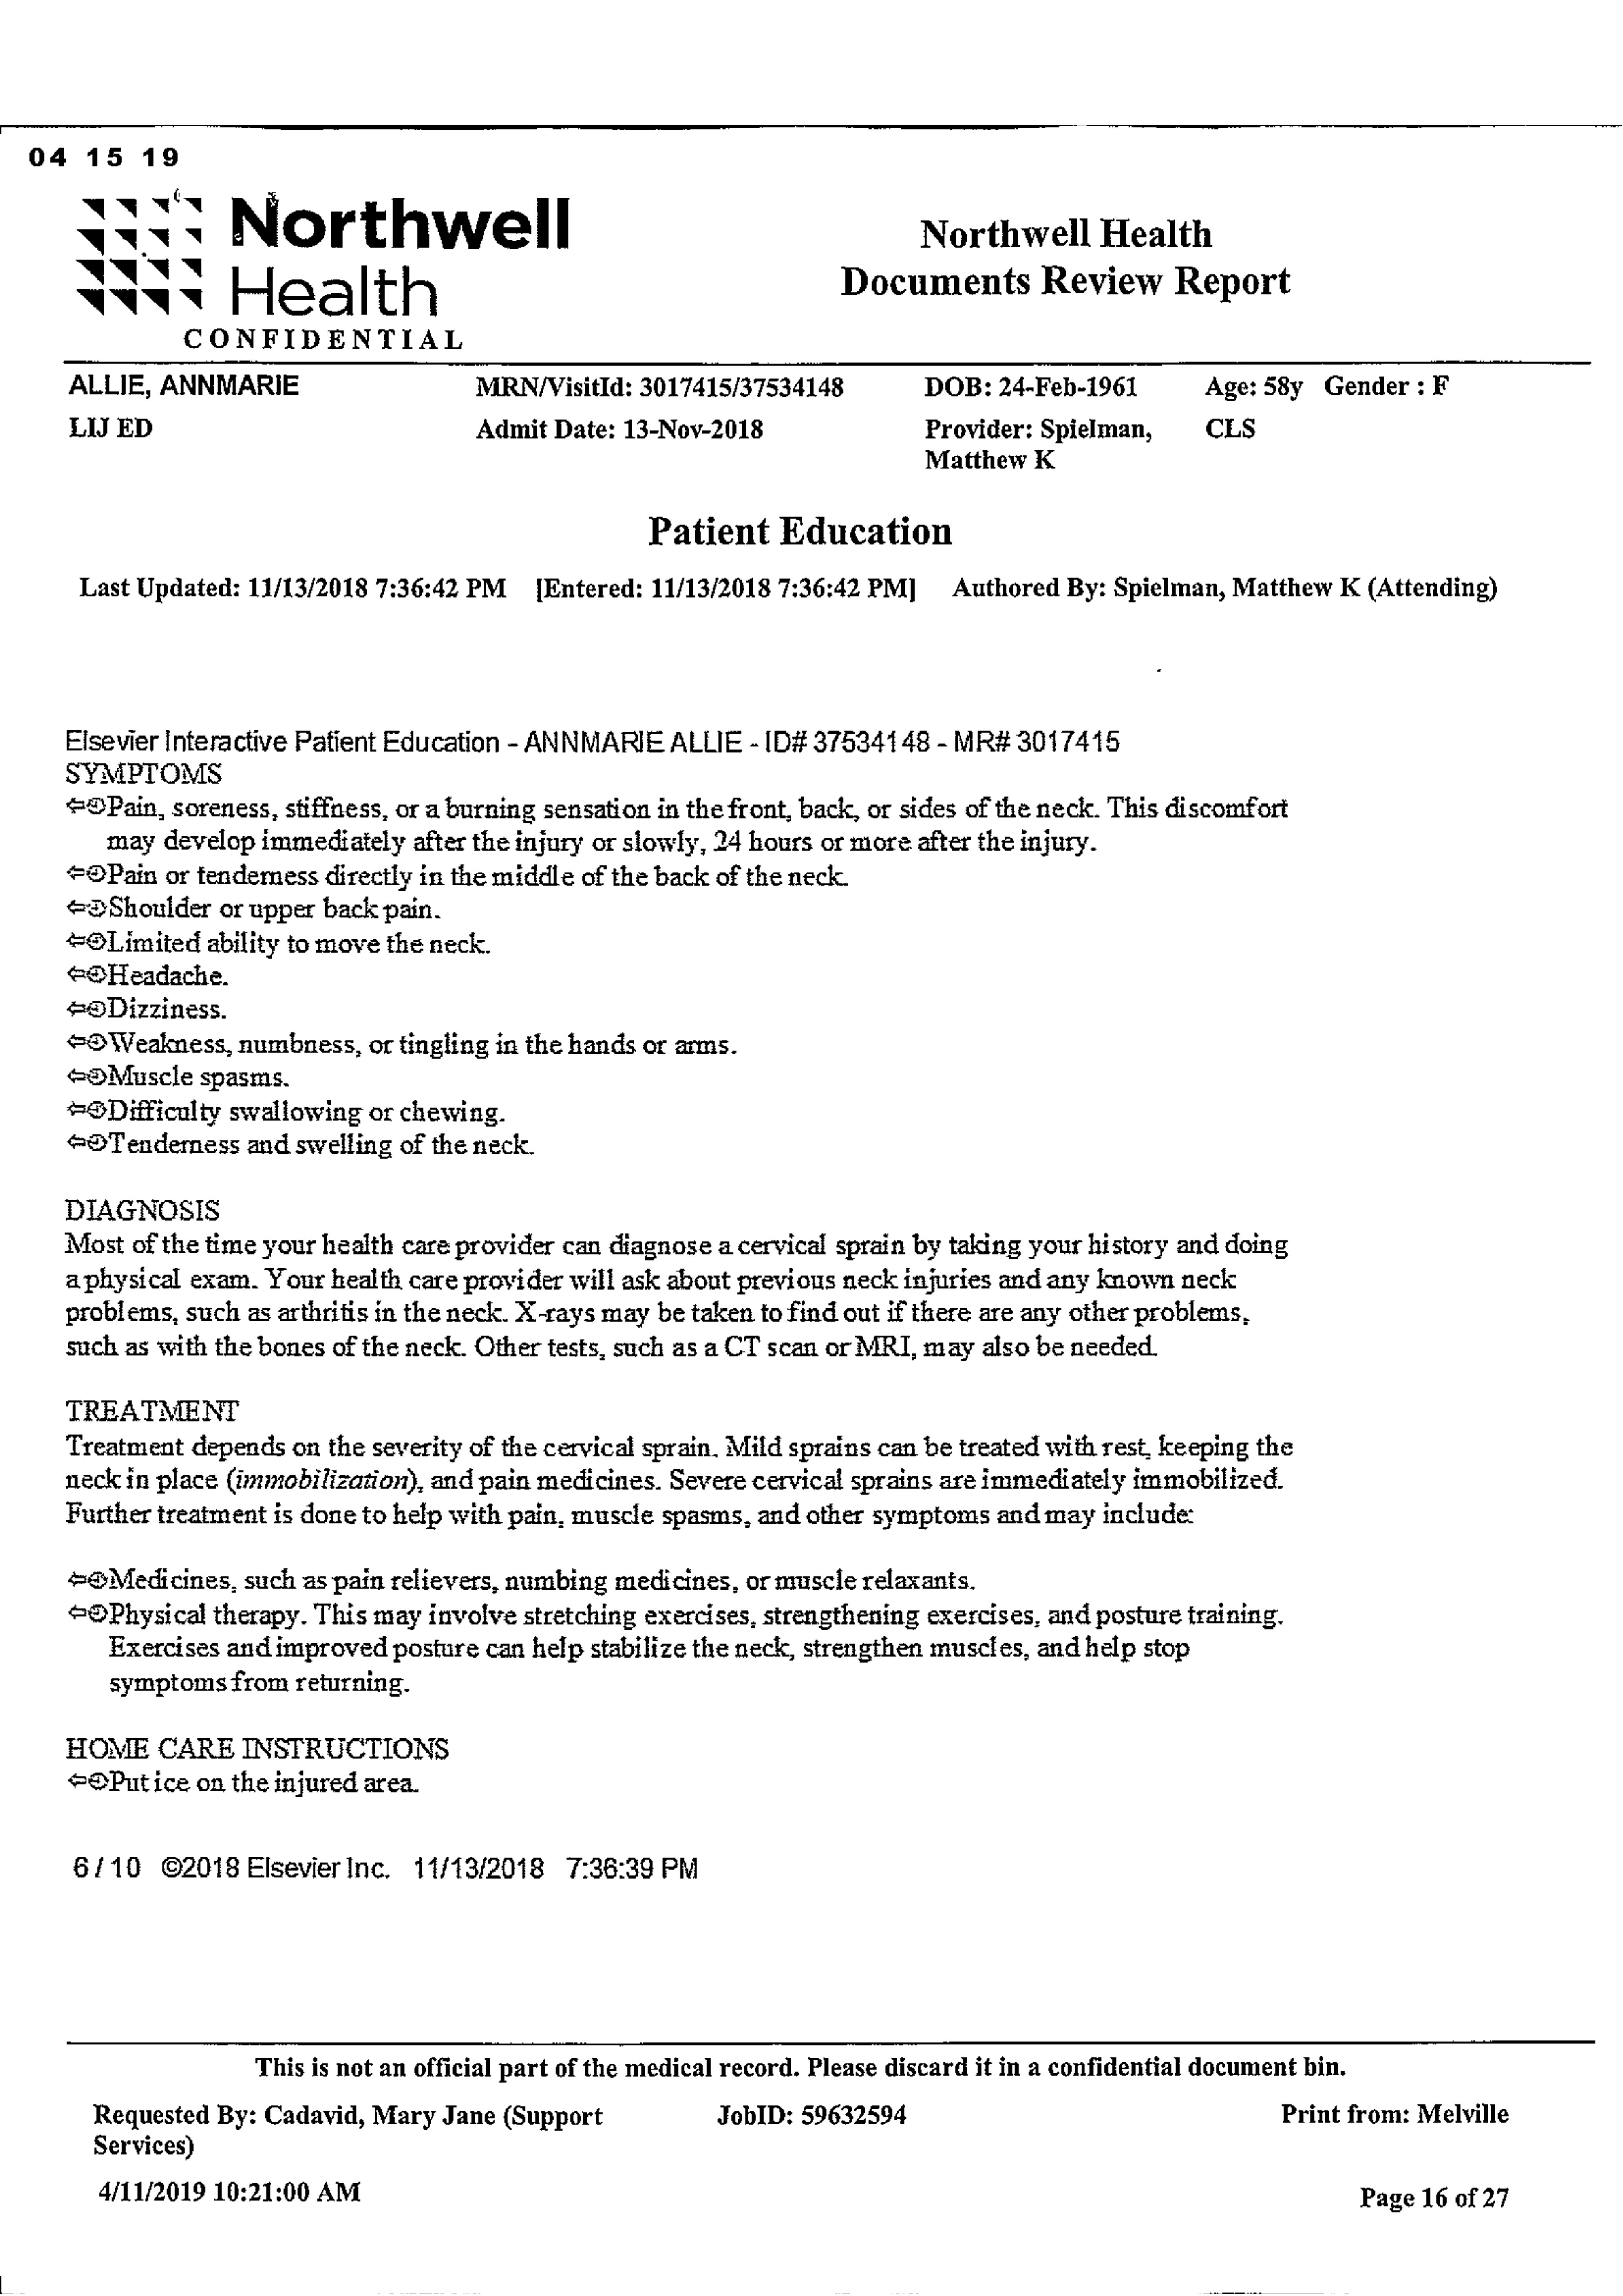

In [ ]:
from google.colab.patches import cv2_imshow
""" cv2_imshow is only while using google colab as the regular syntax causes the session to collapse.
    If you are not using colab then ignore the above line and just use cv2.imshow in the coming lines.
"""

#the below lines let us the to select the page number and perform the NLP related tasks on that page.
print('Please input a page number less than ',page_nos)
n = input()

img = cv2.imread(str('p21-33-')+str(n)+'.jpg')
cv2_imshow(img)

## **Extracting text from image using Tesseract**



In [ ]:
#getting the text from the document (page selected in the previous lines)
content = pytesseract.image_to_string(img)
print(content)

04 15 19

w355. Northwell Northwell Health

me Documents Review Report
was Health P
CONFIDENTIAL
ALLIE, ANNMARIE MRN/VisitId: 3017415/37534148 DOB: 24-Feb-1961 Age: 58y Gender: F
LIJ ED Admit Date: 13-Nov-2018 Provider: Spielman, CLS
Matthew Kk
Patient Education

Last Updated: 11/13/2018 7:36:42 PM [Entered: 11/13/2018 7:36:42 PM] Authored By: Spielman, Matthew K (Attending)

Elsevier Interactive Patient Education - ANNMARIE ALLIE - ID# 375341 48 - MR# 3017415

SYMPTOMS

“@Pain, soreness, stiffness, or a burning sensation in the front, back, or sides of the neck. This discomfort
may develop immediately after the injury or slowly, 24 hours or more after the injury.

“Pain or tendemess directly in the middle of the back of the neck.

Shoulder or upper back pain.

“@Limited ability to move the neck.

e@Headache.

#© Dizziness.

© Weakness, numbness, or tingling in the hands or arms.

Muscle spasms.

-@Difficulty swallowing or chewing.

OT endemess and swelling of the neck.

DIAGNOSIS

Mos

In [ ]:
import scispacy
import spacy.cli
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

In [ ]:
#downloading the spacy model that we will be using. Refer to spacy website for other models
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz

     |████████████████████████████████| 70.1MB 60kB/s 
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.2.4-cp36-none-any.whl size=70531467 sha256=cefb5375447f71fec9923ad90d11202ce976eb3abf5c2f1c34ecf61cec6030d3
  Stored in directory: /root/.cache/pip/wheels/e1/06/4f/75676083b8afcd820050011e7c88bfbae8b42c6f36a3aca6f8
Successfully built en-ner-bc5cdr-md


In [ ]:
#renaming the installed model as en_ner_bc5cdr_md
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz en_ner_bc5cdr_md 

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz


In [ ]:
#importing the model that was downloaded
import en_ner_bc5cdr_md
model = en_ner_bc5cdr_md
#loading the model as nlp
nlp = model.load()

In [ ]:
# breaking the entire text into chunks or sentences
doc = nlp(content)
print(list(doc.sents))

[04 15 19

w355., Northwell Northwell Health

me Documents Review Report
was Health P
CONFIDENTIAL
ALLIE, ANNMARIE MRN/VisitId: 3017415/37534148 DOB: 24-Feb-1961 Age: 58y Gender: F
LIJ ED Admit Date: 13-Nov-2018 Provider: Spielman,, CLS
Matthew Kk
Patient Education

, Last Updated: 11/13/2018 7:36:42 PM [Entered: 11/13/2018 7:36:42 PM], Authored By: Spielman, Matthew K (Attending)

Elsevier Interactive Patient Education - ANNMARIE ALLIE - ID# 375341 48 - MR# 3017415

SYMPTOMS

“@Pain, soreness, stiffness, or a burning sensation in the front, back, or sides of the neck., This discomfort
may develop immediately after the injury or slowly, 24 hours or more after the injury.

, “Pain or tendemess directly in the middle of the back of the neck.

, Shoulder or upper back pain.

, “@Limited ability to move the neck.

, e@Headache.

, #© Dizziness.

, © Weakness, numbness, or tingling in the hands or arms.

, Muscle spasms.

, -@Difficulty swallowing or chewing.

, OT endemess and swelling of 

In [ ]:
# breaking the entire text into entities
entities = []
for i in range(len(doc.ents)):
    entities.append(doc.ents[i])
entities

[DOB,
 Matthew K,
 @Pain,
 stiffness,
 Pain,
 pain,
 numbness,
 tingling,
 Muscle spasms,
 OT endemess,
 swelling,
 neck injuries,
 arthritis,
 sprains,
 pain,
 sprains,
 pain,
 muscle spasms,
 pain,
 Put,
 Requested,
 4/11/2019 10:21:00 AM]

In [ ]:
#printing the entities along with their labels
out = ([(ent.text,ent.label_) for ent in entities])
print(out)

[('DOB', 'CHEMICAL'), ('Matthew K', 'CHEMICAL'), ('@Pain', 'DISEASE'), ('stiffness', 'DISEASE'), ('Pain', 'DISEASE'), ('pain', 'DISEASE'), ('numbness', 'DISEASE'), ('tingling', 'DISEASE'), ('Muscle spasms', 'DISEASE'), ('OT endemess', 'CHEMICAL'), ('swelling', 'DISEASE'), ('neck injuries', 'DISEASE'), ('arthritis', 'DISEASE'), ('sprains', 'CHEMICAL'), ('pain', 'DISEASE'), ('sprains', 'CHEMICAL'), ('pain', 'DISEASE'), ('muscle spasms', 'DISEASE'), ('pain', 'DISEASE'), ('Put', 'CHEMICAL'), ('Requested', 'CHEMICAL'), ('4/11/2019 10:21:00 AM', 'CHEMICAL')]


In [ ]:
#returns the detected words to a given entity name. Here, all the entities linked to disease are returned
for x,y in out:
    if y=='DISEASE':
        print(x)

@Pain
stiffness
Pain
pain
numbness
tingling
Muscle spasms
swelling
neck injuries
arthritis
pain
pain
muscle spasms
pain


In [ ]:
#displays the entities and their labels on the document
displacy.render(doc,style='ent',jupyter=True)

In [ ]:
#displays the dependency among the entities
displacy.render(entities, style='dep',jupyter = True)

In [ ]:
def show_medical_abbreviation(model,document):
    """
        model = pretrained model from spacy library
        document = document to be processed 
    """
    nlp = model.load()
    abbreviation_pipe = AbbreviationDetector(nlp)
    nlp.add_pipe(abbreviation_pipe)
    doc = nlp(content)
    abbreviated = list(set([f"{abrv} {abrv._.long_form}" for abrv in doc._.abbreviations]))
    return abbreviated

In [ ]:
show_medical_abbreviation(model,content)

[]